<a href="https://colab.research.google.com/github/Akshaykumarmundrathi/CustomerSegmentation-Banking/blob/master/hiddenMarkov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

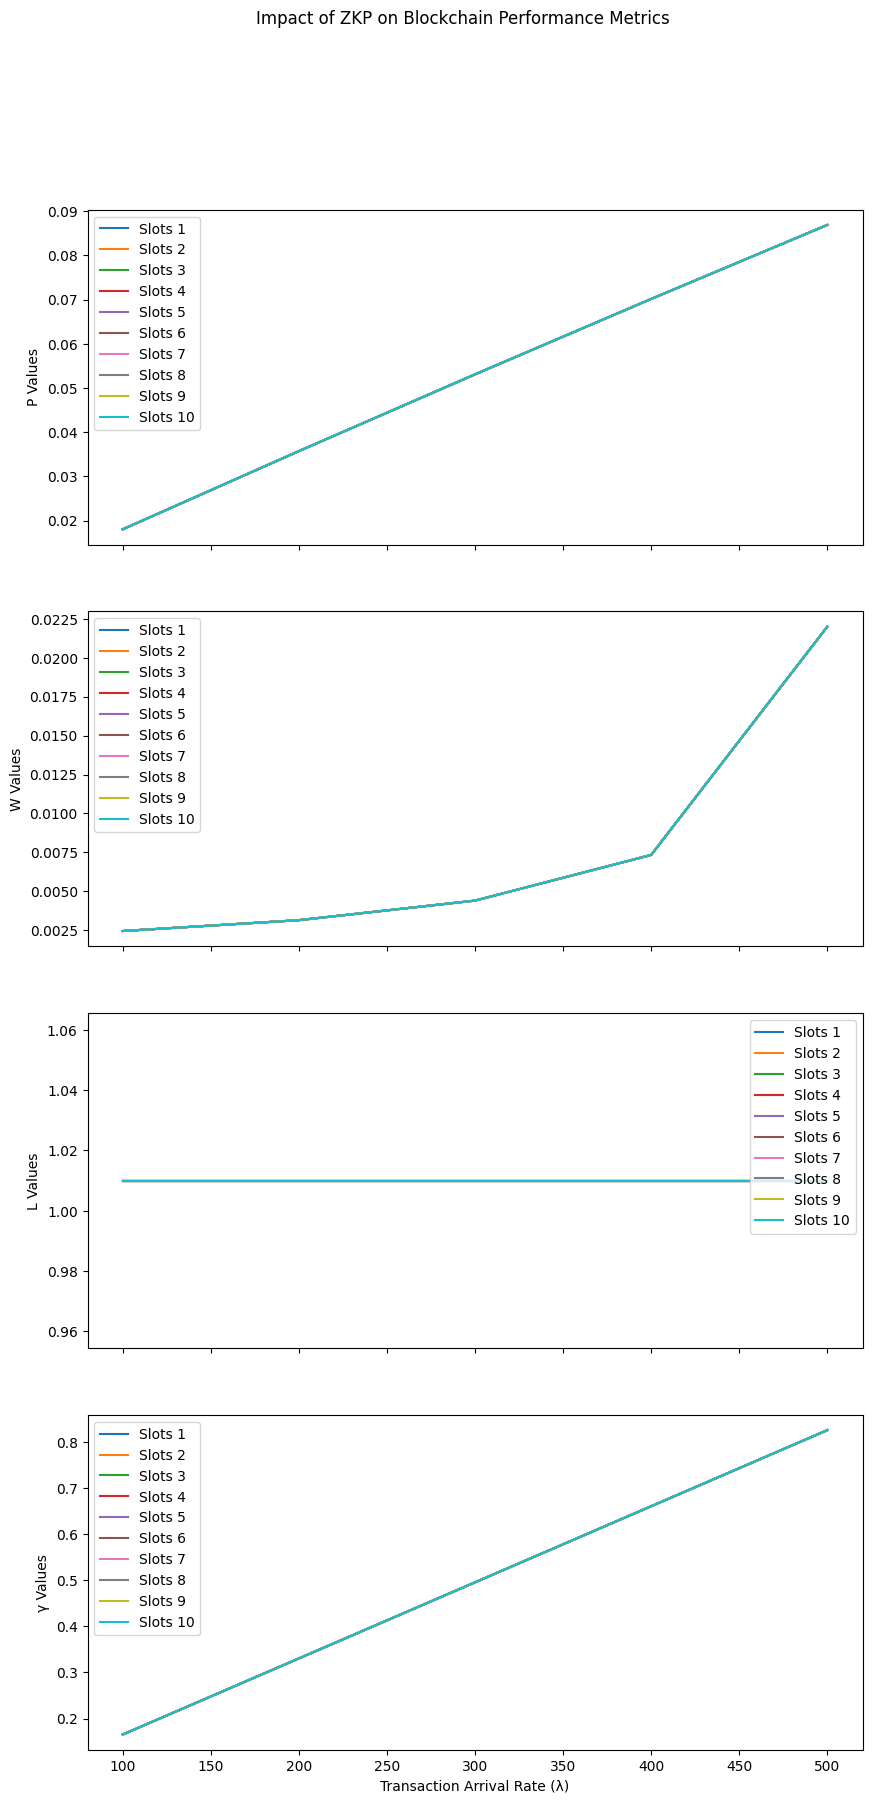

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_metrics(i, lambda_rate, mu, ZKP_overhead):
    # Definitions based on the effects of ZKP
    P = 1 - np.exp(-ZKP_overhead * lambda_rate / mu)  # Simplified model for privacy
    W = 1 / (mu - lambda_rate) * (1 + ZKP_overhead)  # Wait time increases with ZKP overhead
    L = 1 + ZKP_overhead * 0.1  # Block space requirements increase
    gamma = lambda_rate / mu / (1 + ZKP_overhead)  # Throughput decreases with ZKP complexity

    return P, W, L, gamma

# Parameters
transaction_slots = np.arange(1, 11)  # Number of transaction slots
lambda_rates = np.linspace(100, 500, 5)  # Transaction arrival rates
mu = 550  # Constant block posting rate, assume lambda <= mu
ZKP_overhead = 0.1  # Overhead from implementing ZKP

# Simulate and store results
results = {}
for i in transaction_slots:
    results[i] = {'P': [], 'W': [], 'L': [], 'γ': []}
    for lambda_rate in lambda_rates:
        P, W, L, gamma = simulate_metrics(i, lambda_rate, mu, ZKP_overhead)
        results[i]['P'].append(P)
        results[i]['W'].append(W)
        results[i]['L'].append(L)
        results[i]['γ'].append(gamma)

# Plotting results
fig, axes = plt.subplots(4, 1, figsize=(10, 20), sharex=True)
for i, metric in enumerate(['P', 'W', 'L', 'γ']):
    for key in results:
        axes[i].plot(lambda_rates, results[key][metric], label=f'Slots {key}')
    axes[i].set_ylabel(f'{metric} Values')
    axes[i].legend()

axes[3].set_xlabel('Transaction Arrival Rate (λ)')
plt.suptitle('Impact of ZKP on Blockchain Performance Metrics')
plt.show()


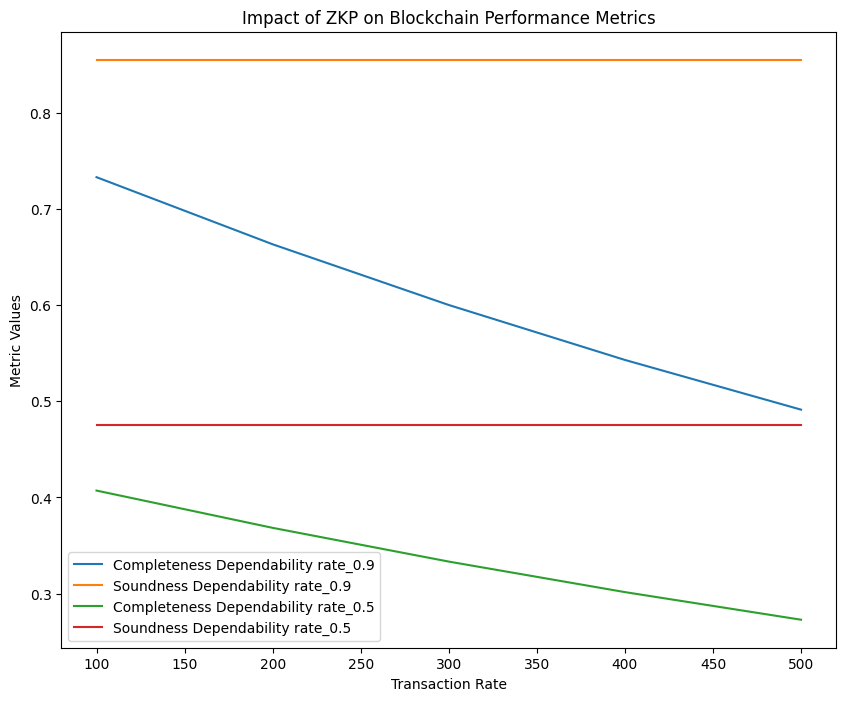

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to simulate metrics
def simulate_metrics(transaction_rate, dependability_rate, ZKP_overhead):
    """
    Simulate Completeness, Soundness based on given transaction rate,
    dependability rate, and ZKP overhead.
    """
    # Hypothetical function for Completeness:
    # Higher transaction rates might decrease Completeness due to increased system load,
    # but higher dependability rate and the application of ZKP could improve it.
    Completeness = (1 - ZKP_overhead) * dependability_rate * np.exp(-transaction_rate / 1000)

    # Hypothetical function for Soundness:
    # Assumes Soundness is affected by ZKP overhead but supported by higher dependability.
    Soundness = (1 - ZKP_overhead * 0.5) * dependability_rate

    # For simplicity, assuming Zero-Knowledge is perfectly maintained (not realistic in practical scenarios)
    Zero_Knowledge = 1.0  # This is a placeholder, in real scenarios, this would be more complex.

    return Completeness, Soundness, Zero_Knowledge

# Define transaction rates and dependability rates
transaction_rates = np.linspace(100, 500, 5)
dependability_rates = [0.9, 0.5]  # High and medium dependability scenarios

results = {}
for rate in dependability_rates:
    metrics = []
    for tr in transaction_rates:
        P, S, Z = simulate_metrics(tr, rate, ZKP_overhead=0.1)
        metrics.append((P, S, Z))
    results[f'rate_{rate}'] = metrics

# Plot the results
plt.figure(figsize=(10, 8))
for rate, metrics in results.items():
    P_vals, S_vals, Z_vals = zip(*metrics)  # Unzip the tuple list into three lists
    plt.plot(transaction_rates, P_vals, label=f'Completeness Dependability {rate}')
    plt.plot(transaction_rates, S_vals, label=f'Soundness Dependability {rate}')

plt.title('Impact of ZKP on Blockchain Performance Metrics')
plt.xlabel('Transaction Rate')
plt.ylabel('Metric Values')
plt.legend()
plt.show()
